In [1]:
import torch
import pickle
import numpy as np
from sklearn.utils import shuffle
from scipy.stats import pearsonr
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE, Isomap
from sklearn.preprocessing import StandardScaler

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

In [3]:
from transformers import DistilBertModel

In [4]:
wiki = DistilBertModel.from_pretrained('distilbert-base-uncased')

Some weights of the model checkpoint at distilbert-base-uncased were not used when initializing DistilBertModel: ['vocab_layer_norm.weight', 'vocab_projector.bias', 'vocab_layer_norm.bias', 'vocab_projector.weight', 'vocab_transform.bias', 'vocab_transform.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [5]:
wiki_params = dict(wiki.named_parameters())
wiki_self1 = torch.cat([wiki_params['transformer.layer.0.attention.q_lin.weight'], wiki_params['transformer.layer.0.attention.k_lin.weight'], wiki_params['transformer.layer.0.attention.v_lin.weight'], wiki_params['transformer.layer.0.attention.out_lin.weight']])
wiki_self1 = wiki_self1.detach().cpu().numpy()

wiki_self2 = torch.cat([wiki_params['transformer.layer.1.attention.q_lin.weight'], wiki_params['transformer.layer.1.attention.k_lin.weight'], wiki_params['transformer.layer.1.attention.v_lin.weight'], wiki_params['transformer.layer.1.attention.out_lin.weight']])
wiki_self2 = wiki_self2.detach().cpu().numpy()

wiki_self3 = torch.cat([wiki_params['transformer.layer.2.attention.q_lin.weight'], wiki_params['transformer.layer.2.attention.k_lin.weight'], wiki_params['transformer.layer.2.attention.v_lin.weight'], wiki_params['transformer.layer.2.attention.out_lin.weight']])
wiki_self3 = wiki_self3.detach().cpu().numpy()

wiki_self4 = torch.cat([wiki_params['transformer.layer.3.attention.q_lin.weight'], wiki_params['transformer.layer.3.attention.k_lin.weight'], wiki_params['transformer.layer.3.attention.v_lin.weight'], wiki_params['transformer.layer.3.attention.out_lin.weight']])
wiki_self4 = wiki_self4.detach().cpu().numpy()

wiki_self5 = torch.cat([wiki_params['transformer.layer.4.attention.q_lin.weight'], wiki_params['transformer.layer.4.attention.k_lin.weight'], wiki_params['transformer.layer.4.attention.v_lin.weight'], wiki_params['transformer.layer.4.attention.out_lin.weight']])
wiki_self5 = wiki_self5.detach().cpu().numpy()

wiki_self6 = torch.cat([wiki_params['transformer.layer.5.attention.q_lin.weight'], wiki_params['transformer.layer.5.attention.k_lin.weight'], wiki_params['transformer.layer.5.attention.v_lin.weight'], wiki_params['transformer.layer.5.attention.out_lin.weight']])
wiki_self6 = wiki_self6.detach().cpu().numpy()

In [6]:
arith = torch.load('./Models/Arith/checkpoint-54000/pytorch_model.bin')

In [7]:
arith_self1 = torch.cat([arith['distilbert.transformer.layer.0.attention.q_lin.weight'], arith['distilbert.transformer.layer.0.attention.k_lin.weight'], arith['distilbert.transformer.layer.0.attention.v_lin.weight'], arith['distilbert.transformer.layer.0.attention.out_lin.weight']])
arith_self1 = arith_self1.detach().cpu().numpy()

arith_self2 = torch.cat([arith['distilbert.transformer.layer.1.attention.q_lin.weight'], arith['distilbert.transformer.layer.1.attention.k_lin.weight'], arith['distilbert.transformer.layer.1.attention.v_lin.weight'], arith['distilbert.transformer.layer.1.attention.out_lin.weight']])
arith_self2 = arith_self2.detach().cpu().numpy()

arith_self3 = torch.cat([arith['distilbert.transformer.layer.2.attention.q_lin.weight'], arith['distilbert.transformer.layer.2.attention.k_lin.weight'], arith['distilbert.transformer.layer.2.attention.v_lin.weight'], arith['distilbert.transformer.layer.2.attention.out_lin.weight']])
arith_self3 = arith_self3.detach().cpu().numpy()

arith_self4 = torch.cat([arith['distilbert.transformer.layer.3.attention.q_lin.weight'], arith['distilbert.transformer.layer.3.attention.k_lin.weight'], arith['distilbert.transformer.layer.3.attention.v_lin.weight'], arith['distilbert.transformer.layer.3.attention.out_lin.weight']])
arith_self4 = arith_self4.detach().cpu().numpy()

arith_self5 = torch.cat([arith['distilbert.transformer.layer.4.attention.q_lin.weight'], arith['distilbert.transformer.layer.4.attention.k_lin.weight'], arith['distilbert.transformer.layer.4.attention.v_lin.weight'], arith['distilbert.transformer.layer.4.attention.out_lin.weight']])
arith_self5 = arith_self5.detach().cpu().numpy()

arith_self6 = torch.cat([arith['distilbert.transformer.layer.5.attention.q_lin.weight'], arith['distilbert.transformer.layer.5.attention.k_lin.weight'], arith['distilbert.transformer.layer.5.attention.v_lin.weight'], arith['distilbert.transformer.layer.5.attention.out_lin.weight']])
arith_self6 = arith_self6.detach().cpu().numpy()

In [8]:
cola = DistilBertModel.from_pretrained('textattack/distilbert-base-uncased-CoLA')

Some weights of the model checkpoint at textattack/distilbert-base-uncased-CoLA were not used when initializing DistilBertModel: ['pre_classifier.weight', 'pre_classifier.bias', 'classifier.weight', 'classifier.bias']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [9]:
cola_params = dict(cola.named_parameters())
cola_self1 = torch.cat([cola_params['transformer.layer.0.attention.q_lin.weight'], cola_params['transformer.layer.0.attention.k_lin.weight'], cola_params['transformer.layer.0.attention.v_lin.weight'], cola_params['transformer.layer.0.attention.out_lin.weight']])
cola_self1 = cola_self1.detach().cpu().numpy()

cola_self2 = torch.cat([cola_params['transformer.layer.1.attention.q_lin.weight'], cola_params['transformer.layer.1.attention.k_lin.weight'], cola_params['transformer.layer.1.attention.v_lin.weight'], cola_params['transformer.layer.1.attention.out_lin.weight']])
cola_self2 = cola_self2.detach().cpu().numpy()

cola_self3 = torch.cat([cola_params['transformer.layer.2.attention.q_lin.weight'], cola_params['transformer.layer.2.attention.k_lin.weight'], cola_params['transformer.layer.2.attention.v_lin.weight'], cola_params['transformer.layer.2.attention.out_lin.weight']])
cola_self3 = cola_self3.detach().cpu().numpy()

cola_self4 = torch.cat([cola_params['transformer.layer.3.attention.q_lin.weight'], cola_params['transformer.layer.3.attention.k_lin.weight'], cola_params['transformer.layer.3.attention.v_lin.weight'], cola_params['transformer.layer.3.attention.out_lin.weight']])
cola_self4 = cola_self4.detach().cpu().numpy()

cola_self5 = torch.cat([cola_params['transformer.layer.4.attention.q_lin.weight'], cola_params['transformer.layer.4.attention.k_lin.weight'], cola_params['transformer.layer.4.attention.v_lin.weight'], cola_params['transformer.layer.4.attention.out_lin.weight']])
cola_self5 = cola_self5.detach().cpu().numpy()

cola_self6 = torch.cat([cola_params['transformer.layer.5.attention.q_lin.weight'], cola_params['transformer.layer.5.attention.k_lin.weight'], cola_params['transformer.layer.5.attention.v_lin.weight'], cola_params['transformer.layer.5.attention.out_lin.weight']])
cola_self6 = cola_self6.detach().cpu().numpy()

In [10]:
mrpc = DistilBertModel.from_pretrained('textattack/distilbert-base-uncased-MRPC')

Some weights of the model checkpoint at textattack/distilbert-base-uncased-MRPC were not used when initializing DistilBertModel: ['pre_classifier.weight', 'pre_classifier.bias', 'classifier.weight', 'classifier.bias']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [11]:
mrpc_params = dict(mrpc.named_parameters())
mrpc_self1 = torch.cat([mrpc_params['transformer.layer.0.attention.q_lin.weight'], mrpc_params['transformer.layer.0.attention.k_lin.weight'], mrpc_params['transformer.layer.0.attention.v_lin.weight'], mrpc_params['transformer.layer.0.attention.out_lin.weight']])
mrpc_self1 = mrpc_self1.detach().cpu().numpy()

mrpc_self2 = torch.cat([mrpc_params['transformer.layer.1.attention.q_lin.weight'], mrpc_params['transformer.layer.1.attention.k_lin.weight'], mrpc_params['transformer.layer.1.attention.v_lin.weight'], mrpc_params['transformer.layer.1.attention.out_lin.weight']])
mrpc_self2 = mrpc_self2.detach().cpu().numpy()

mrpc_self3 = torch.cat([mrpc_params['transformer.layer.2.attention.q_lin.weight'], mrpc_params['transformer.layer.2.attention.k_lin.weight'], mrpc_params['transformer.layer.2.attention.v_lin.weight'], mrpc_params['transformer.layer.2.attention.out_lin.weight']])
mrpc_self3 = mrpc_self3.detach().cpu().numpy()

mrpc_self4 = torch.cat([mrpc_params['transformer.layer.3.attention.q_lin.weight'], mrpc_params['transformer.layer.3.attention.k_lin.weight'], mrpc_params['transformer.layer.3.attention.v_lin.weight'], mrpc_params['transformer.layer.3.attention.out_lin.weight']])
mrpc_self4 = mrpc_self4.detach().cpu().numpy()

mrpc_self5 = torch.cat([mrpc_params['transformer.layer.4.attention.q_lin.weight'], mrpc_params['transformer.layer.4.attention.k_lin.weight'], mrpc_params['transformer.layer.4.attention.v_lin.weight'], mrpc_params['transformer.layer.4.attention.out_lin.weight']])
mrpc_self5 = mrpc_self5.detach().cpu().numpy()

mrpc_self6 = torch.cat([mrpc_params['transformer.layer.5.attention.q_lin.weight'], mrpc_params['transformer.layer.5.attention.k_lin.weight'], mrpc_params['transformer.layer.5.attention.v_lin.weight'], mrpc_params['transformer.layer.5.attention.out_lin.weight']])
mrpc_self6 = mrpc_self6.detach().cpu().numpy()

In [12]:
norm1 = StandardScaler()
wiki_self1_norm = norm1.fit_transform(wiki_self1)
arith_self1_norm = norm1.transform(arith_self1)
cola_self1_norm = norm1.transform(cola_self1)
mrpc_self1_norm = norm1.transform(mrpc_self1)

norm2 = StandardScaler()
wiki_self2_norm = norm2.fit_transform(wiki_self2)
arith_self2_norm = norm2.transform(arith_self2)
cola_self2_norm = norm2.transform(cola_self2)
mrpc_self2_norm = norm2.transform(mrpc_self2)

norm3 = StandardScaler()
wiki_self3_norm = norm3.fit_transform(wiki_self3)
arith_self3_norm = norm3.transform(arith_self3)
cola_self3_norm = norm3.transform(cola_self3)
mrpc_self3_norm = norm3.transform(mrpc_self3)

norm4 = StandardScaler()
wiki_self4_norm = norm4.fit_transform(wiki_self4)
arith_self4_norm = norm4.transform(arith_self4)
cola_self4_norm = norm4.transform(cola_self4)
mrpc_self4_norm = norm4.transform(mrpc_self4)

norm5 = StandardScaler()
wiki_self5_norm = norm5.fit_transform(wiki_self5)
arith_self5_norm = norm5.transform(arith_self5)
cola_self5_norm = norm5.transform(cola_self5)
mrpc_self5_norm = norm5.transform(mrpc_self5)

norm6 = StandardScaler()
wiki_self6_norm = norm6.fit_transform(wiki_self6)
arith_self6_norm = norm6.transform(arith_self6)
cola_self6_norm = norm6.transform(cola_self6)
mrpc_self6_norm = norm6.transform(mrpc_self6)

In [13]:
import pandas as pd

/home/mandarsharma/anaconda3/envs/aaai/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:795: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/home/mandarsharma/anaconda3/envs/aaai/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:805: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


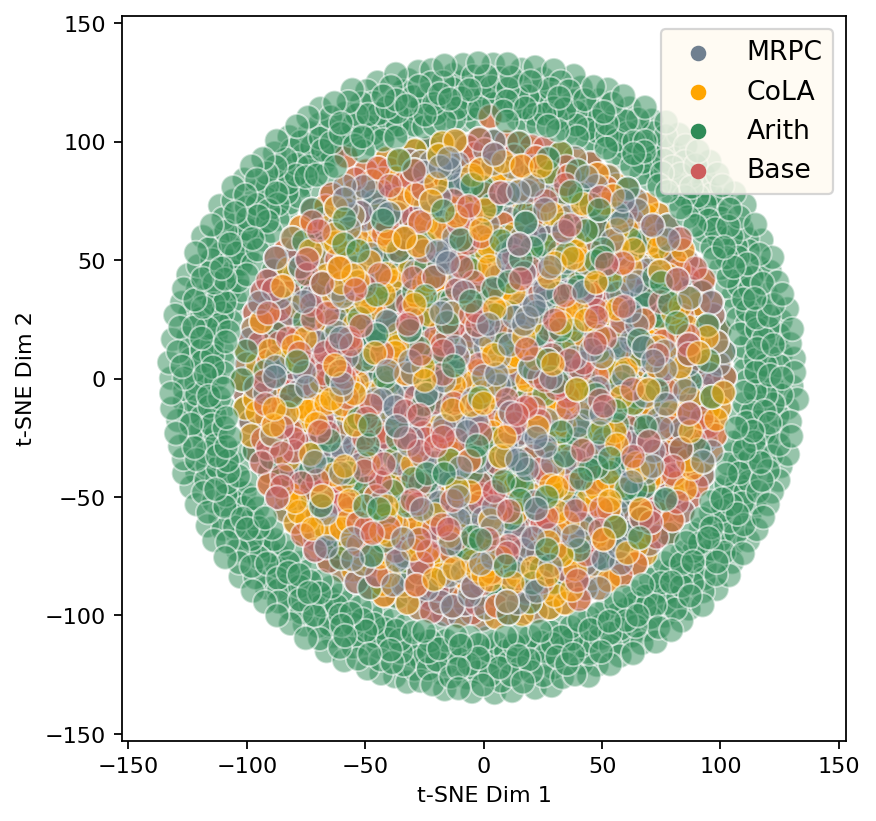

In [58]:
X_data = np.concatenate([wiki_self1_norm, arith_self1_norm, cola_self1_norm, mrpc_self1_norm])
y_data = np.concatenate([np.array(['Base']*3072),np.array(['Arith']*3072),np.array(['CoLA']*3072),np.array(['MRPC']*3072)])
X_data, y_data = shuffle(X_data, y_data)

ts = TSNE(n_components=2, perplexity=1)
self1_ts = ts.fit_transform(X_data)

tsne_result_df = pd.DataFrame({'t-SNE Dim 1': self1_ts[:,0], 't-SNE Dim 2': self1_ts[:,1], 'label': y_data})
fig, ax = plt.subplots(1, figsize=(8, 6), dpi=160)
sns.scatterplot(x='t-SNE Dim 1', y='t-SNE Dim 2', hue='label', alpha = 0.5, data=tsne_result_df, palette=['slategray','orange','seagreen','indianred'], ax=ax,s=120)
lim = (self1_ts.min()-20, self1_ts.max()+20)
ax.set_xlim(lim)
ax.set_ylim(lim)
ax.set_aspect('equal')
ax.legend(facecolor='floralwhite', prop={'size': 12}, loc ='upper right')

In [ ]:
X_data = np.concatenate([wiki_self5_norm, arith_self5_norm, cola_self5_norm, mrpc_self5_norm])
y_data = np.concatenate([np.array(['Base']*3072),np.array(['Arith']*3072),np.array(['CoLA']*3072),np.array(['MRPC']*3072)])
X_data, y_data = shuffle(X_data, y_data)

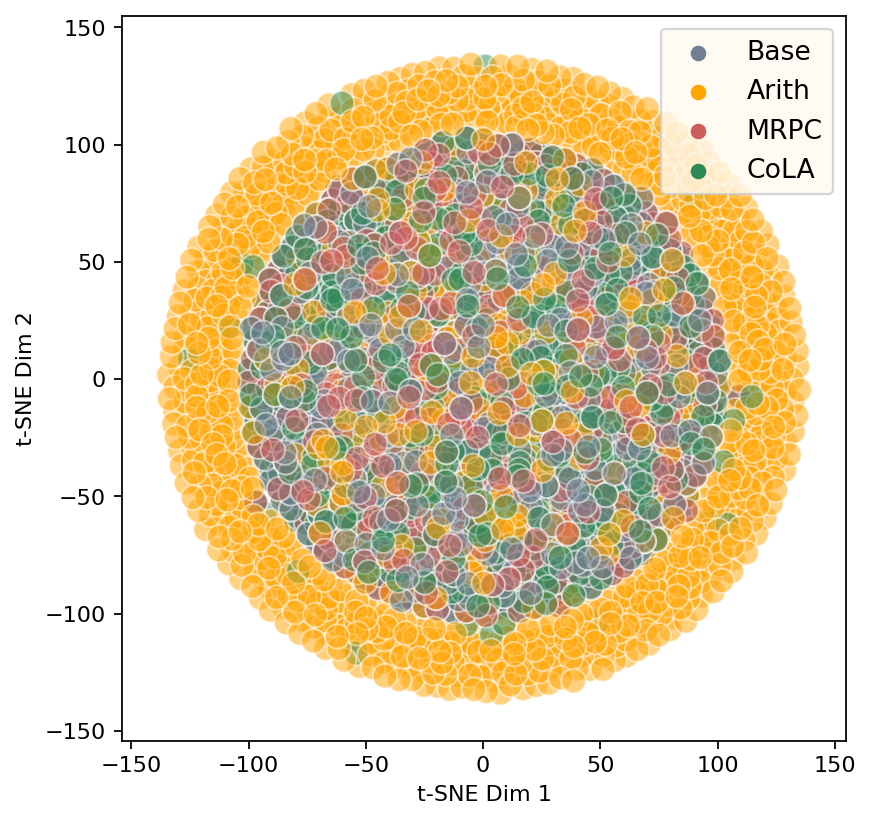

In [68]:
tsne_result_df = pd.DataFrame({'t-SNE Dim 1': self1_ts[:,0], 't-SNE Dim 2': self1_ts[:,1], 'label': y_data})
fig, ax = plt.subplots(1, figsize=(8, 6), dpi=160)
sns.scatterplot(x='t-SNE Dim 1', y='t-SNE Dim 2', hue='label', alpha = 0.5, palette=['slategray','orange','indianred','seagreen'], data=tsne_result_df, ax=ax,s=120)
lim = (self1_ts.min()-20, self1_ts.max()+20)
ax.set_xlim(lim)
ax.set_ylim(lim)
ax.set_aspect('equal')
ax.legend(facecolor='floralwhite', prop={'size': 12}, loc ='upper right')